In [2]:
import numpy as np
import keras
from keras.datasets import mnist
import math

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [94]:
for a in range(len(y_train)):
    if (y_train[a]==y_train[0]):
        y_train[a]=1
    else:
        y_train[a]=0

In [95]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

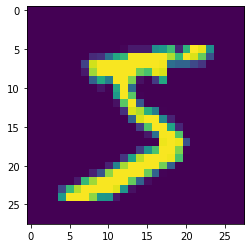

In [96]:
#uses matplotlib to display values stored in mnist_data.
import matplotlib.pyplot as plt
image=x_train[0]
plt.imshow(image) #display one image out of the other.
plt.show() #display multiple images together

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import GridSearchCV

In [98]:
num_classes = 10

In [99]:
img_rows, img_cols = 28, 28

In [100]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [101]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [102]:
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000,)

In [103]:
y_train.argmax(axis=0)

0

In [104]:
x_train.size

47040000

In [105]:
x_train.ndim

4

In [106]:
x_train.shape

(60000, 28, 28, 1)

In [107]:
#array of size 60k containing flattened image pixels
f_img_array = [item.flatten() for item in x_train]

In [108]:
weights = np.asarray([0.0 for count in range(x_train.shape[1] * x_train.shape[2] + 1)])
weights.shape = (weights.shape[0], 1)
weights.shape

(785, 1)

In [109]:
weights2 = np.random.randn(x_train.shape[1]*x_train.shape[2]+1,1)
weights2.shape

(785, 1)

In [10]:
def w_sum(image, weight):
    image2=image.flatten()
    wgt_sum=0
    wgt_sum+=weight[0]
    for i in range (len(image2)):
        wgt_sum += (weight[i+1] * (image2[i]))
        
    return wgt_sum

In [11]:
def total_w_sum(image_array, weight):
    lenth=len(image_array)

    t_w_sum = np.arange(lenth, dtype=float)

    for i in range(len(image_array)):
        t_w_sum[i] = w_sum(image_array[i], weight)
        
    return t_w_sum

In [12]:
def activate_func(value):
    if value > 500:
        value = 500
    if value < -500:
        value = -500
    out_value=0
    out_value=1/(1+math.exp(-1 * value))
    return out_value

In [13]:
def t_activation(in_array):
    activ_array = np.asarray([0.0 for count in range(len(in_array))])
    
    for b in range(len(in_array)):
        value=activate_func(in_array[b])
        if (value>0.7):
            activ_array[b]=1
        else:
            activ_array[b]=0
        
    return activ_array

In [14]:
# t_activation(output)

In [15]:
def loss_func(learn_rate, image, expected, predicted, weights_array):
    
    error=np.asarray([0.0 for count in range(len(weights_array))])
    diff=expected-predicted                      #predicted value comes from the activation function
        
    error[0]=learn_rate*diff                     #error for bias term is calculated using a weighted sum of 1
    for j in range(1, len(weights_array)):       #iterate in every pixel of the image = 784
            error[j]=learn_rate*diff*image[j-1]  #calculate the error of every pixel
    
    for t in range(len(weights_array)):
        weights_array[t]+=error[t]               #updating the weights for every pixel in image

In [16]:
def t_loss_func(learn_rate, images_arr, expected_arr, predicted_array, weights_array):
    
    for i in range(0, len(predicted_array)):   #iterate 60k times
        loss_func(learn_rate, images_arr[i], expected_arr[i], predicted_array[i], weights_array)
    
    for t in range(len(weights_array)):        #prints 785 new updated weights
        print(weights_array[t])

In [17]:
def main():
    for i in range(5):
        output=np.array([])
        output = total_w_sum(x_train, weights2)
        t_loss_func(0.001, f_img_array, y_train, t_activation(output), weights2)
        print('epoch ends\n\n\n')

In [18]:
main()

NameError: name 'np' is not defined

In [ ]:
weights2.shape

In [ ]:
weights3=np.delete(weights2, 0)  #delete a particular index (0) of the array.
weights3=weights3.reshape((28,28))

In [ ]:
plt.imshow(weights3) #display one image out of the other.